<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/MiniProject1%20/Part2/FaultDetection/MaFaulDa_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir gdown


In [ ]:
!gdown 1kxvVnU16Mp-QKCpGJ4o0HiE86JbX6P7N
#https://drive.google.com/file/d/1kxvVnU16Mp-QKCpGJ4o0HiE86JbX6P7N/view?usp=sharing


Downloading...
From (original): https://drive.google.com/uc?id=1kxvVnU16Mp-QKCpGJ4o0HiE86JbX6P7N
From (redirected): https://drive.google.com/uc?id=1kxvVnU16Mp-QKCpGJ4o0HiE86JbX6P7N&confirm=t&uuid=1e7fc6a3-3a3b-4627-9d72-016a03e8bd2c
To: /content/MAFAULDA_MultiClass.zip
100% 366M/366M [00:04<00:00, 88.9MB/s]


In [ ]:
!pip install scipy
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/12.9024.csv')
df.columns
df.head(10)
df.tail(10)


,-0.55471,2.6626,0.0075057,-1.2435,0.0020086,0.074679,-0.53343,0.099397
249989,-0.51524,2.54350,-0.253990,0.034397,0.93704,0.80104,0.172370,0.015992
249990,-0.50502,-0.41244,-0.809550,0.506920,0.82513,0.63638,0.044222,-0.010220
249991,-0.51271,1.66400,-0.205110,0.910080,0.94533,0.78346,0.145840,-0.060040
249992,-0.51188,-0.68189,-0.899360,0.936120,0.81345,0.59229,0.010532,0.080098
249993,-0.50267,0.49535,0.172720,0.946230,0.90911,0.73147,0.089033,-0.120350
249994,-0.52021,-0.47803,0.090177,0.940530,0.87247,0.65270,0.054471,0.116240
249995,-0.50331,-1.60920,0.845270,1.168900,0.88439,0.67581,0.062717,-0.116460
249996,-0.51513,-1.13470,0.849480,1.230800,0.88832,0.65739,0.071932,0.100220
249997,-0.51290,-4.20740,0.871420,0.817280,0.80707,0.57268,-0.003140,-0.051424
249998,-0.50170,-2.12370,1.619100,0.152340,0.92577,0.71919,0.121860,0.006889


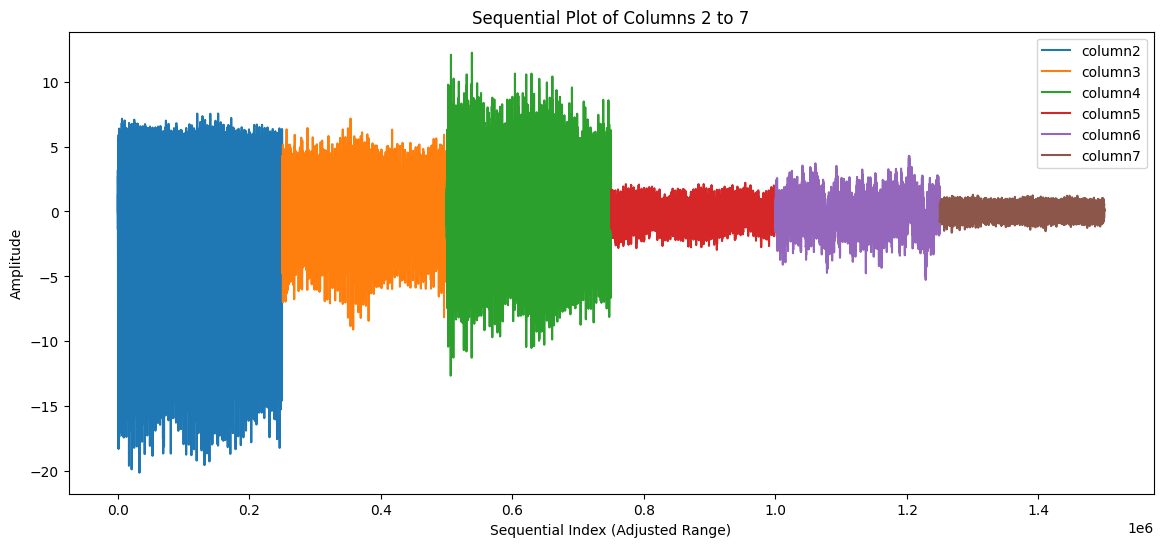

In [ ]:

plt.figure(figsize=(14, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

x_ranges = []
current_x = 0
for column_name in df.columns[1:7]:
    signal_length = len(df[column_name].values)
    x_ranges.append((current_x, current_x + signal_length))
    current_x += signal_length

for i, column_name in enumerate(df.columns[1:7]):
    signal = df[column_name].values
    x_start, x_end = x_ranges[i]
    plt.plot(range(x_start, x_end), signal, label=f'column{i+2}', color=colors[i])

plt.xlabel('Sequential Index (Adjusted Range)')
plt.ylabel('Amplitude', rotation=90)
plt.title('Sequential Plot of Columns 2 to 7')
plt.grid(False)
plt.legend()
plt.show()

In [ ]:
indices_to_drop = [0, 6, 7]
columns_to_drop = df.columns[indices_to_drop]
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.head()

,2.6626,0.0075057,-1.2435,0.0020086,0.074679
0,-0.060254,-0.272350,-0.971600,-0.060314,-0.026114
1,3.157500,-0.012428,-0.601360,0.033099,0.086334
2,0.262880,-0.525880,-0.407750,-0.031959,-0.028161
3,2.692300,-0.262980,-0.022806,0.044101,0.055883
4,0.506010,-0.971360,0.185780,-0.038966,-0.072397


In [ ]:
import pandas as pd

def standardize_column(series):
    mean = series.mean()
    std = series.std()
    return (series - mean) / std

def standardize_dataframe(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    df[numerical_cols] = df[numerical_cols].apply(standardize_column)
    return df
df = standardize_dataframe(df)

print(df)

          2.6626  0.0075057   -1.2435  0.0020086  0.074679
0      -0.017745  -0.249248 -0.628425  -0.095415 -0.037864
1       0.734555  -0.010765 -0.388961   0.025172  0.053905
2       0.057802  -0.481867 -0.263739  -0.058811 -0.039535
3       0.625793  -0.240651 -0.014765   0.039375  0.029054
4       0.114645  -0.890603  0.120144  -0.067857 -0.075636
...          ...        ...       ...        ...       ...
249994 -0.115420   0.083377  0.608301   1.108719  0.516121
249995 -0.379884   0.776189  0.756006   1.124106  0.534981
249996 -0.268947   0.780052  0.796041   1.129180  0.519949
249997 -0.987335   0.800182  0.528585   1.024294  0.450816
249998 -0.500172   1.486192  0.098516   1.177524  0.570384

[249999 rows x 5 columns]
